In [5]:
from google.colab import files
uploaded = files.upload()

Saving painkillers_dataset_clear.csv to painkillers_dataset_clear.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('painkillers_dataset_clear.csv')
df.head()

,Name,Mol.Wt,Melting Pt,Toxicity Level
0,Amitriptyline,277.0,197,Medium
1,Aspirin,180.0,135,Medium
2,Bromadol\t,408.0,208,High
3,Buprenorphine,467.0,213,High
4,Capsaicin,305.0,62,Low


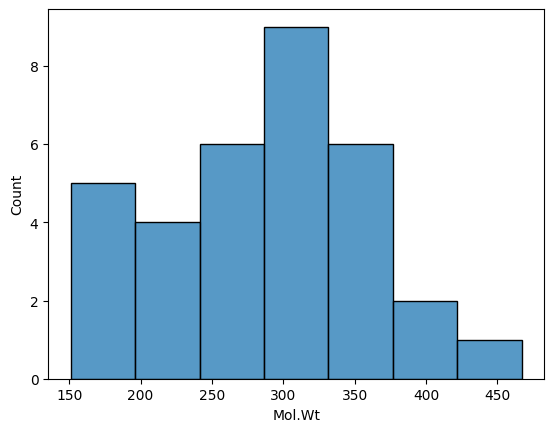

In [8]:
sns.histplot(df['Mol.Wt'])
plt.show()

In [9]:
df.columns

Index(['Name', 'Mol.Wt', 'Melting Pt', 'Toxicity Level'], dtype='object')

In [10]:
print(df.columns)


Index(['Name', 'Mol.Wt', 'Melting Pt', 'Toxicity Level'], dtype='object')


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['name', 'mol.wt', 'melting_pt', 'toxicity_level'], dtype='object')


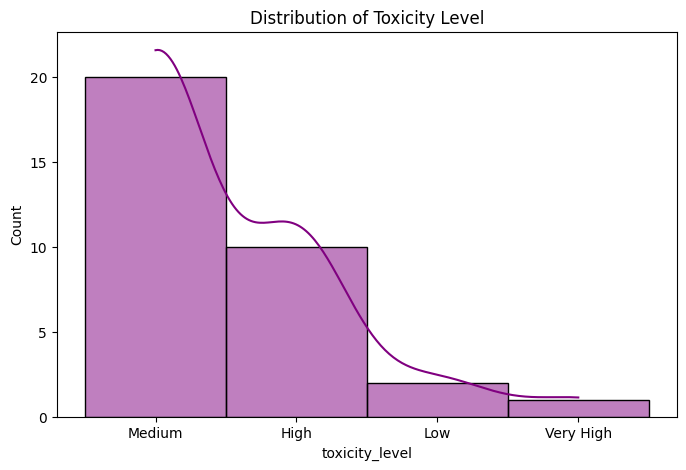

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['toxicity_level'], kde=True, color='purple')
plt.title('Distribution of Toxicity Level')
plt.show()

In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
print(df.columns)

Index(['name', 'molwt', 'melting_pt', 'toxicity_level'], dtype='object')


In [14]:
df[['molwt', 'melting_pt']].describe()


,molwt
count,33.000000
mean,287.173939
std,73.705181
min,151.000000
25%,234.000000
50%,293.000000
75%,336.000000
max,467.000000


In [15]:
df_sorted = df.sort_values(by='melting_pt')


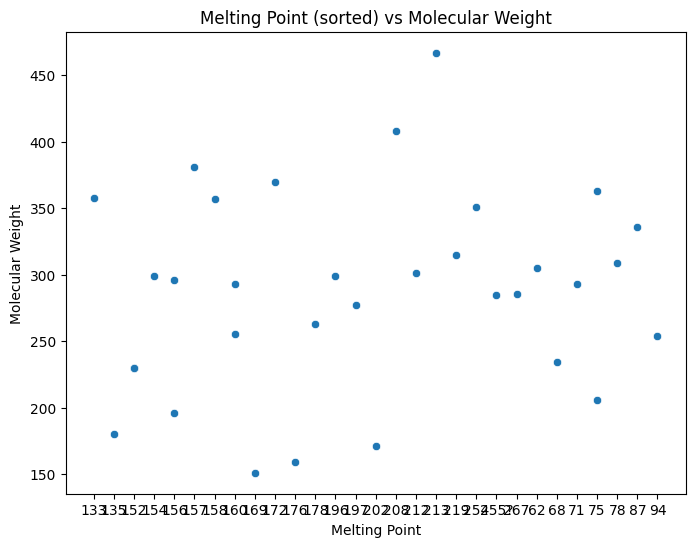

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='melting_pt', y='molwt', data=df_sorted)
plt.title('Melting Point (sorted) vs Molecular Weight')
plt.xlabel('Melting Point')
plt.ylabel('Molecular Weight')
plt.show()


In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')


In [24]:
print(df[df['melting_pt'].str.contains(r'\D', na=False)])


        name  molwt melting_pt toxicity_level
21  Morphine  285.0       255?           High


In [25]:
df['melting_pt'] = pd.to_numeric(df['melting_pt'], errors='coerce')


In [26]:
df = df.dropna(subset=['melting_pt', 'molwt'])


In [27]:
print(df[['melting_pt', 'molwt']].dtypes)


melting_pt    float64
molwt         float64
dtype: object


Intercept: 258.73778193051425
Coefficient: 0.18441790906258487
R-squared: 0.02


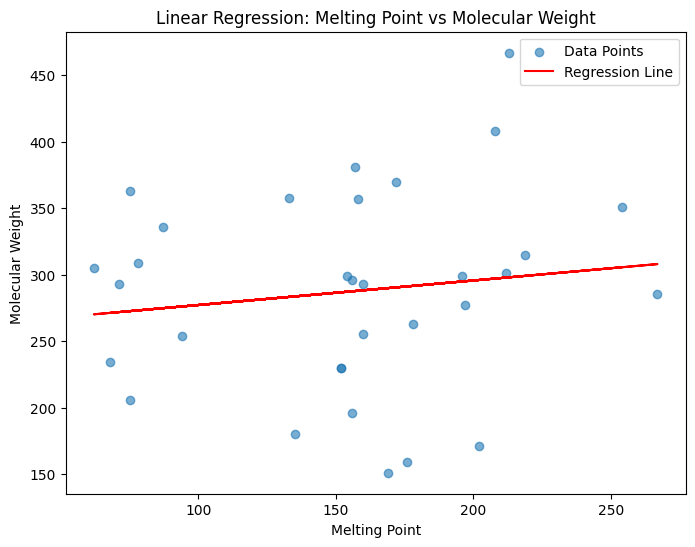

In [28]:
X = df[['melting_pt']]
y = df['molwt']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

y_pred = model.predict(X)

from sklearn.metrics import r2_score
print(f"R-squared: {r2_score(y, y_pred):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(df['melting_pt'], df['molwt'], alpha=0.6, label='Data Points')
plt.plot(df['melting_pt'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Melting Point vs Molecular Weight')
plt.xlabel('Melting Point')
plt.ylabel('Molecular Weight')
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: 0.02
